# Da Vinci Satellite: Bonaire Day 3 Briefing Lecture

The content that was created is the briefing lecture prior to the excursion to  ground station. The content showcases information processing, filtering, modulation and covers content of noise.

# Modulation and Noise Effects

We know that modulation allows us to encode information to a signal with more frequency and allow us to send the information with less power!

So let's generate a random signal that might be used. For this signal, we will assume the satellite is sending it's battery levels back.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

In [3]:
time = np.linspace(0, 1, 1000)
battery_level = 100 * np.exp(-0.97 * time) + np.abs(np.sin(2 * np.pi * 5 * time))
yhat = savgol_filter(battery_level, 100, 5)

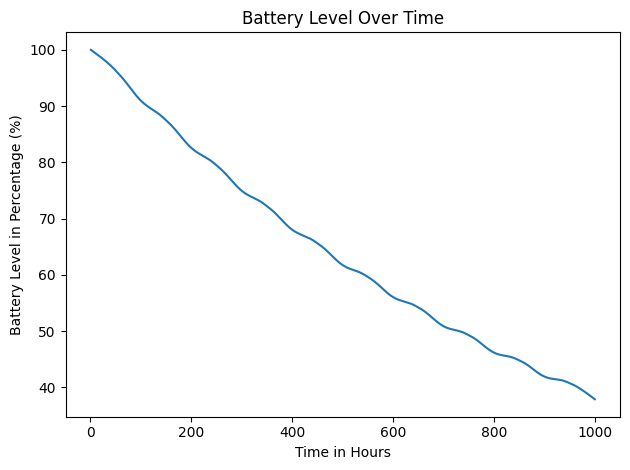

In [4]:
plt.plot([i+1 for i in range(len(yhat))], yhat)
plt.title('Battery Level Over Time')
plt.xlabel('Time in Hours')
plt.ylabel('Battery Level in Percentage (%)')
plt.tight_layout()

Now, we will going to generate a very high frequency wave to encode our information to. This will be our carrier wave, and we will make it a cosine function with high enough frequency.

In [5]:
time = np.linspace(0, 1, 1000)
f = 12.5 # Hertz
a_c = 1.4
carrier_wave = a_c * np.cos([2*np.pi*f*t for t in time])

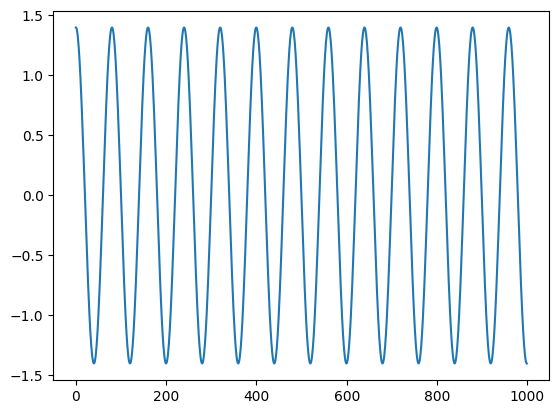

In [6]:
plt.plot(carrier_wave)

If we modulate them together, we can now send the same information but through more frequency hence less power! Modulation in terms of amplitude can be done using the following formula:

$$ x_{mod} = (A_{carrier} + x_{information}) \cdot \cos{(\omega_{c}t)} $$

In [7]:
x_mod = (a_c + battery_level) * np.cos([2*np.pi*f*t for t in time])

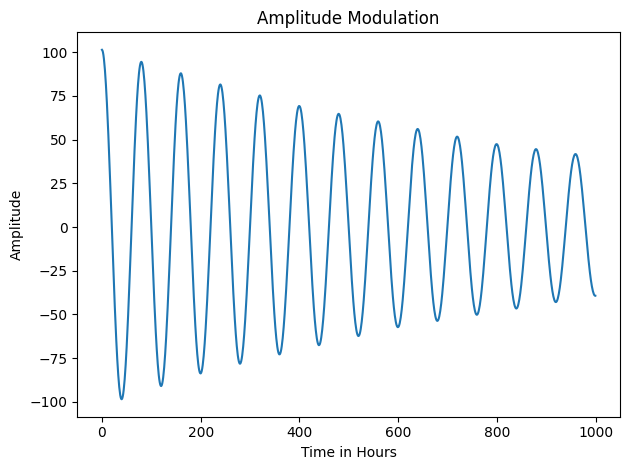

In [8]:
plt.plot(x_mod)
plt.title('Amplitude Modulation')
plt.xlabel('Time in Hours')
plt.ylabel('Amplitude')
plt.tight_layout()

We can alternative choose to frequency modulate the information. For this, the frequency of the carrier wave would be altered to carry the information.

$$ x_{mod} = A_{carrier}\cos(\omega_c t + x_{information})$$

In [9]:
x_mod_f = a_c * np.cos([(2*np.pi*f + battery_level[idx])*t  for idx, t in enumerate(time)])

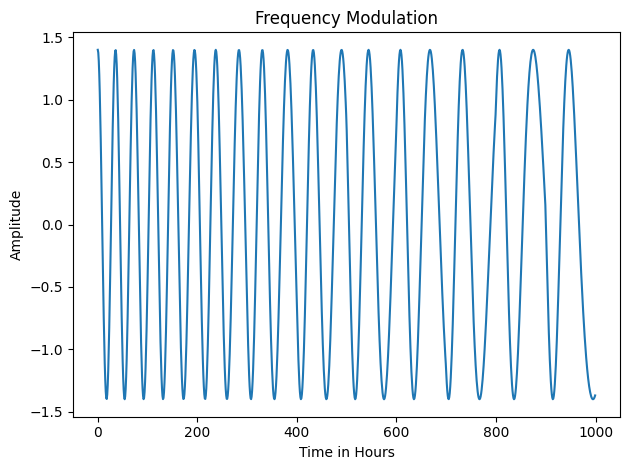

In [10]:
plt.plot(x_mod_f)
plt.title('Frequency Modulation')
plt.xlabel('Time in Hours')
plt.ylabel('Amplitude')
plt.tight_layout()

## Noise

We then are going to generate some sort of noise that is caused in the signal transmission. This noise is going to be representative of the combined effects of 
1. Sensor-related noise
2. Atmosphere related noise
3. Receiver-related noise.

In [11]:
noise_strength = 0.1

noise = noise_strength * np.random.normal(0,np.std(battery_level, ddof=1),len(time))

Let's see how the noise looks like!

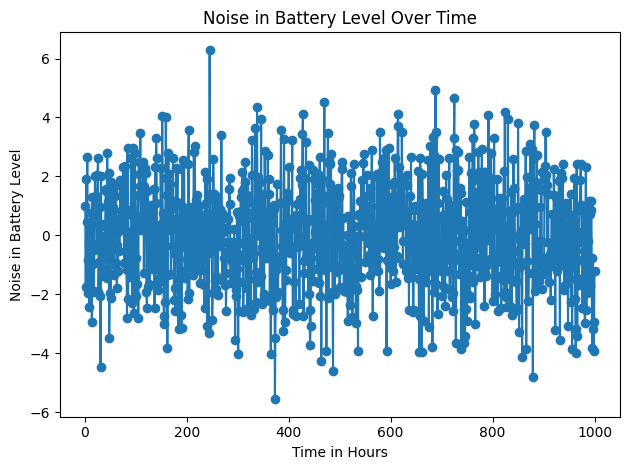

In [12]:
plt.plot([i+1 for i in range(len(noise))], noise, marker='o')
plt.title('Noise in Battery Level Over Time')
plt.xlabel('Time in Hours')
plt.ylabel('Noise in Battery Level')
plt.tight_layout()

We add this noise to our information and see how it is affected.

In [13]:
corrupted = yhat + noise

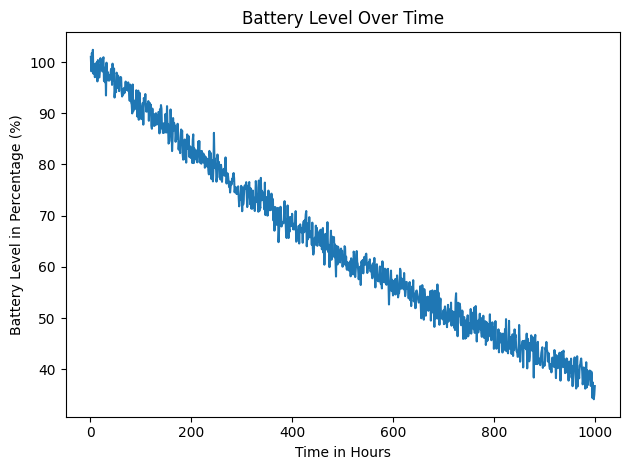

In [14]:
plt.plot([i+1 for i in range(len(corrupted))], corrupted)
plt.title('Battery Level Over Time')
plt.xlabel('Time in Hours')
plt.ylabel('Battery Level in Percentage (%)')
plt.tight_layout()

And what if we varied the the signal power, how would that affect the signal?

In [22]:
corrupted_signals = []
for ns in [0.1, 0.4, 0.8]:
    noise_selected = ns * np.random.normal(0,np.std(battery_level, ddof=1),len(time))
    corruption = yhat + noise_selected
    corrupted_signals.append(corruption)

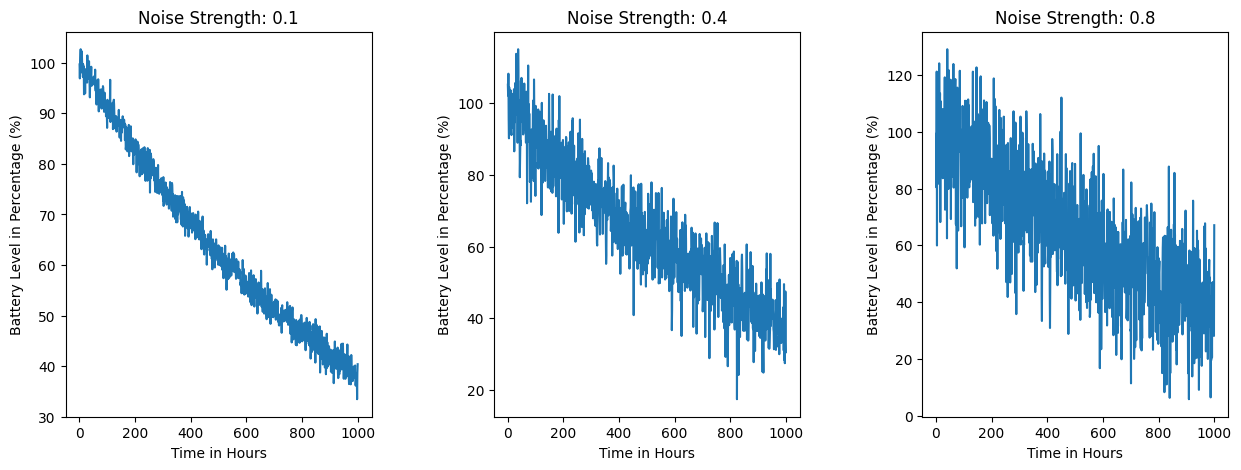

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(ax)):
    line, = ax[i].plot([j+1 for j in range(len(corrupted_signals[i]))], corrupted_signals[i])
    ax[i].set_title('Noise Strength: {}'.format([0.1, 0.4, 0.8][i]))
    ax[i].set_xlabel('Time in Hours')
    ax[i].set_ylabel('Battery Level in Percentage (%)')

plt.subplots_adjust(wspace=0.4)

And what if we modulate these signals?

In [ ]:
x_mod = (a_c + battery_level) * np.cos([2*np.pi*f*t for t in time])a_c * np.cos([(2*np.pi*f + battery_level[idx])*t  for idx, t in enumerate(time)])
x_mod_f = 

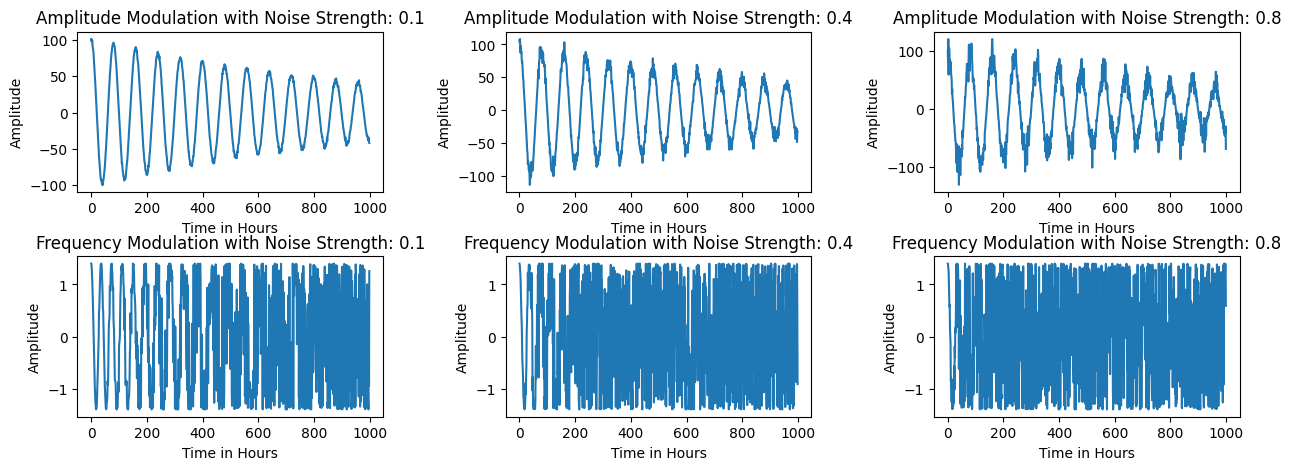

In [38]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
for i in range(len(corrupted_signals)):
    line, = ax[0, i].plot((a_c + corrupted_signals[i]) * np.cos([2*np.pi*f*t for t in time]))
    ax[0, i].set_title('Amplitude Modulation with Noise Strength: {}'.format([0.1, 0.4, 0.8][i]))
    ax[0, i].set_xlabel('Time in Hours')
    ax[0, i].set_ylabel('Amplitude')

    line, = ax[1, i].plot(a_c * np.cos([(2*np.pi*f + corrupted_signals[i][idx])*t  for idx, t in enumerate(time)]))
    ax[1, i].set_title('Frequency Modulation with Noise Strength: {}'.format([0.1, 0.4, 0.8][i]))
    ax[1, i].set_xlabel('Time in Hours')
    ax[1, i].set_ylabel('Amplitude')

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Which one of them still looks like we can use the information of? Which type of modulation is more robust to this noise?